In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install protobuf==3.20.*


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-me

In [3]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

#Dense is used to make a neural network connecting input layer with hidden and output layer 
#Flatten is used to convert multidimentional data (like images) into 1D

2025-12-11 06:55:58.967017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765436159.307108      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765436159.390244      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape  #60000 images in train data of 28 pixcels for each image row wise

(60000, 28, 28)

In [6]:
X_test.shape  #10000 images in test data of 28 pixcels for each image row wise

(10000, 28, 28)

In [7]:
y_train  #shows what digit 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Each X_train consist of a image showing a digit  and each y_train shows what that digit is. 

We can see the image using matplotlib

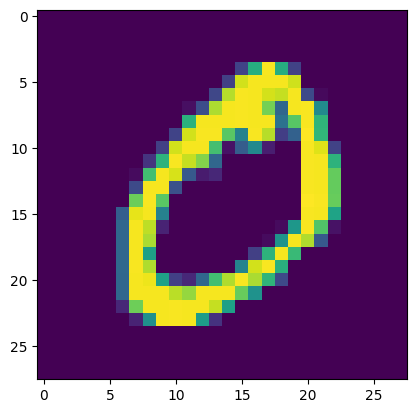

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0]) #5
plt.imshow(X_train[1]) #0

Now we have to make such **Neural Network Architechture** that trains itself to learn, what kind of pixcel value represent which digit.


In [9]:
X_train[0]  #here we can see how the values in this array is in the range of 0 to 255 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

To make the convergence fast and obtain the value of weights and bias in its best correct form to minimize the error
we have to make these datas come in the range between 0-1. So we divide each by its maximum value i.e 255

In [10]:
X_train = X_train/255
X_test = X_test/255

First layer is input: 28x28 = 784

Second layer is hidden: 128 nodes

Third layer is output : 10 nodes ( we have to classify the output as either 0,1,....10)

In [11]:
model = Sequential()

#since the image is 2D so we have to flatten it to 1D

model.add(Flatten(input_shape=(28,28)))

# you don't have to specify input for hidden layer because the output from the first automatically becomes input for this
model.add(Dense(128,activation='relu'))
model.add(Dense(98,activation='relu'))

#remember to use softmax as activation function for multi classification problems
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-12-11 06:56:19.830107: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 98)             │        12,642 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,112 (445.75 KB)

 Trainable params: 114,112 (445.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
 model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #if we use 'categorical_crossentropy' then the classes would get one hot encoded that consumes more space and memory so using sparse makes it label encoded


In [14]:
history= model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8658 - loss: 0.4433 - val_accuracy: 0.9572 - val_loss: 0.1367
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9631 - loss: 0.1192 - val_accuracy: 0.9613 - val_loss: 0.1270
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9768 - loss: 0.0753 - val_accuracy: 0.9695 - val_loss: 0.1052
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9824 - loss: 0.0557 - val_accuracy: 0.9716 - val_loss: 0.0935
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0388 - val_accuracy: 0.9710 - val_loss: 0.1011
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9749 - val_loss: 0.0951
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9898 - loss: 0.0286 - val_accuracy: 0.9726 - val_loss: 0.0985
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9935 - loss: 0.0192 - 

In [15]:
y_probability=model.predict(X_test) #this stores the array of probability for all 10k images but we want to predict digits for all the images
y_predict=y_probability.argmax(axis=1)  #which row of array has highest probability it stores that index as digit prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.9759

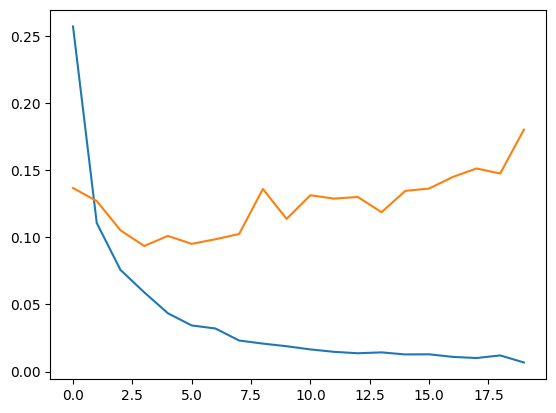

In [17]:
#visualizing the loss and val_loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

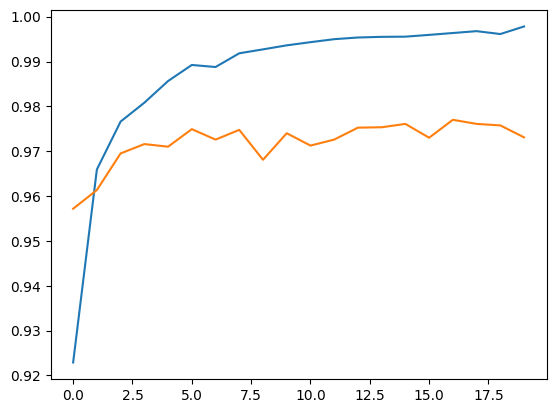

In [18]:
#visualizing the accuracy and val_accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

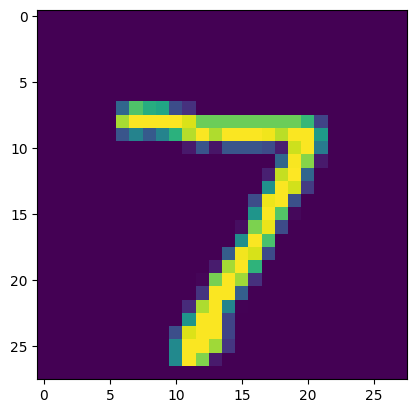

In [19]:
# CHECKING

plt.imshow(X_test[0])

In [20]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([7])

**Note**: You can increase the accuracy further by adding more nodes in a single layer

      You can also increase the number of layers
      
      You can change the activation function as well 
      
      You can increase the number of epochs too

      Use of regularization, dropouts helps reduce overfitting and improves accuracy

      a simple draft of how simple classification is done is shown via this code